In [29]:
'''Importing Packages'''
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import dates
from IPython.display import Markdown as md
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm
import datetime
from statsmodels.api import stats as sm
from loess import loess_1d
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from openpyxl import Workbook, load_workbook
from sklearn import linear_model
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from scipy.linalg import toeplitz
import math
import scipy.stats as stats
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
import calendar
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline
import random

\pagebreak

# Prove equation (5.14) in the textbook for MA(1) process.

For a MA(1) process of the form $y_t = \mu + \varepsilon_t - \theta_1\varepsilon_{t-1}$, where $\varepsilon_t \stackrel{iid}{\sim} N(0,1)$ we can see the following:

The expectation of the process:

$$
\begin{split}
\mathbb{E}[y_t] &= \mathbb{E}[\mu + \varepsilon_t - \theta_1\varepsilon_{t-1}] \\
\\
&= \mathbb{E}[\mu] + \mathbb{E}[\varepsilon_t] - \mathbb{E}[\theta_1\varepsilon_{t-1}] \\
\\
&= \mu + \mathbb{E}[\varepsilon_t] - \theta_1\mathbb{E}[\varepsilon_{t-1}]\\
\\
&= \mu
\end{split}
$$


The variance of the process:

$$
\begin{split}
\text{Var}(y_t) &= \mathbb{E}[y_t^2] - \mathbb{E}[y_t]^2\\
\\
&= \mathbb{E}[(\mu + \varepsilon_t - \theta_1\varepsilon_{t-1})^2] - \mathbb{E}[\mu + \varepsilon_t - \theta_1\varepsilon_{t-1}]^2 \\
\\
&= \mathbb{E}[\mu^2 + 2\mu\varepsilon_t - 2\mu\theta_1\varepsilon_{t-1} -2\theta_1\varepsilon_t\varepsilon_{t-1} + \varepsilon_t^2 + \theta_1^2\varepsilon_{t-1}^2] - \mu^2\\
\\
&= \mathbb{E}[\mu^2] + \mathbb{E}[2\mu\varepsilon_t] - \mathbb{E}[2\mu\theta_1\varepsilon_{t-1}] - \mathbb{E}[2\theta_1\varepsilon_t\varepsilon_{t-1}] + \mathbb{E}[\varepsilon_t^2] + \mathbb{E}[\theta_1^2\varepsilon_{t-1}^2] - \mu^2 \\
\\
&= \mu^2  + \mathbb{E}[\varepsilon_t^2] + \mathbb{E}[\theta_1^2\varepsilon_{t-1}^2] - \mu^2 \\
\\
&= 1 + \theta_1^2 \\
\end{split}
$$

The covariance of the process:

$$
\begin{split}
\text{Cov}(y_t,y_{t+k}) &= \mathbb{E}[y_ty_{t+k}] - \mathbb{E}[y_t]\mathbb{E}[y_{t+k}] \\
\\
& = \mathbb{E}[(\mu + \varepsilon_t - \theta_1\varepsilon_{t-1})(\mu + \varepsilon_{t+k} - \theta_1\varepsilon_{t+k-1})] - \mu^2 \\
\\
& = \mathbb{E}[\mu^2 +\mu\varepsilon_{t+k} - \mu\theta_1\varepsilon_{t+k-1} + \mu\varepsilon_t + \varepsilon_t\varepsilon_{t+k} - \theta_1\varepsilon_t\varepsilon_{t+k-1} - \mu\theta_1\varepsilon_{t-1} - \theta_1\varepsilon_{t-1}\varepsilon_{t+k} + \theta_1^2\varepsilon_{t-1}\varepsilon_{t+k-1}] - \mu^2 \\
\\
\end{split} 
$$

After seperating expectations since it is a linear operator, seperating expectations of iid $N(0,1)$ variables, and using the fact that $\mathbb{E}[N(0,1)] = 0$, we arrive at,

$$
= \mathbb{E}[\varepsilon_t\varepsilon_{t+k}] - \theta_1\mathbb{E}[\varepsilon_t\varepsilon_{t+k-1}] - \theta_1\mathbb{E}[\varepsilon_{t-1}\varepsilon_{t+k}] + \theta_1^2\mathbb{E}[\varepsilon_{t-1}\varepsilon_{t+k-1}] 
$$

Since this is an MA(1) process, we then set $k=1$ which yields,

$$
= \mathbb{E}[\varepsilon_t\varepsilon_{t+1}] - \theta_1\mathbb{E}[\varepsilon_t\varepsilon_{t}] - \theta_1\mathbb{E}[\varepsilon_{t-1}\varepsilon_{t+1}] + \theta_1^2\mathbb{E}[\varepsilon_{t-1}\varepsilon_{t}] 
$$

Using independence we arrive at,

$$
= \mathbb{E}[\varepsilon_t]\mathbb{E}[\varepsilon_{t+1}] - \theta_1\mathbb{E}[\varepsilon_t^2] - \theta_1\mathbb{E}[\varepsilon_{t-1}]\mathbb{E}[\varepsilon_{t+1}] + \theta_1^2\mathbb{E}[\varepsilon_{t-1}]\mathbb{E}[\varepsilon_{t}] 
$$

Since $\mathbb{E}[N(0,1)^2] = 1$ and $\mathbb{E}[N(0,1)] = 0$, we arrive at the solution,

$$
\text{Cov}(y_t,y_{t+k}) = -\theta_1
$$

We then set our autocovariance function $\gamma_y(k)$ as:

$$
\begin{split}
&\gamma_y(0) = \text{Var}(y_t) = 1 + \theta_1^2\\
\\
&\gamma_y(1) = \text{Cov}(y_t, y_{t+1})  = -\theta_1
\end{split}
$$

Then our autocorrelation function, $\rho_y(k)$, is

$$
\rho_y(1) = \frac{\gamma_y(1)}{\gamma_y(0)} = \frac{-\theta_1}{1 + \theta_1^2}
$$

Since $\theta_q$ in a MA(q) process is a weight, we can assum that all $\theta_q \in [-1,1]$. Thus we say $f(\theta_1) = \rho_y(1)$. We then choose $-1$, $0$, and $1$ for values to test. We see the following. 

$$
\begin{split}
f(-1) &= \frac{1}{1+1} = \frac{1}{2}\\
\\
f(0) &= \frac{0}{1} = 0\\
\\
f(1) &= \frac{-1}{1+1} = -\frac{1}{2}
\end{split}
$$



To now see where the global maximum and minimum are, we find the same values for $f^{\prime}(\theta_1)$

$$
\begin{split}
f^{\prime}(\theta_1) &= \frac{\theta_1^2-1}{(1+\theta_1^2)^2}\\
\\
f^{\prime}(-1) &= \frac{0}{(1+1)^2} = 0\\
\\
f^{\prime}(0) &= \frac{-1}{1} = -1\\
\\
f^{\prime}(1) &= \frac{0}{(1+1)^2} = 0
\end{split}
$$

Thus we can clearly see there is a global maximum at $-1$ and global minimum as $1$ since $f'(\theta_1)$ is zero at these values. Since these values are the additive inverse of each other, the following holds with two global maximum of $\frac{1}{2}$ when $\theta_1 = -1, 1$ and new global minimum of $0$ when $\theta_1 = 0$. Thus, 

$$
|\rho_y(1)| = \frac{|\theta_1|}{1 + \theta_1^2} \leq \frac{1}{2}
$$

\pagebreak

# Prove for AR(2) process that: $$\begin{split}&\phi_1 + \phi_2 < 1\\ &\phi_2 - \phi_1 < 1\\ &|\phi_2| <1 \end{split}$$

We start by showing the AR(2) model $y_t = \delta +\phi_1y_{t-1} + \phi_2y_{t-2} + \varepsilon_t$

We start by rewriting the equation in the infinite MA form as

$$
\begin{split}
y_t &= \delta +\phi_1y_{t-1} + \phi_2y_{t-2} + \varepsilon_t\\
\\
y_t - \phi_1y_{t-1} - \phi_2y_{t-2} &= \delta + \varepsilon_t\\
\\
y_t(1-\phi_1B - \phi_2B^2)&= \delta + \varepsilon_t\\
\\
y_t\Phi(B) &= \delta + \varepsilon_t\\
\\
y_t &= \Phi(B)^{-1}\delta + \Phi(B)^{-1}\varepsilon_t\\
\end{split}
$$

We then set $\Phi(B)^{-1}\delta = \mu$  and  $\Phi(B)^{-1} = \Psi(B)$. Thus,

$$
\begin{split}
y_t &= \mu + \Psi(B)\varepsilon_t\\
\\
y_t &= \mu + \sum_{i=0}^{\infty}\psi_iB^i\varepsilon_t
\end{split}
$$

To Get the weights $\phi_1, \phi_2$, we start by setting $\Phi(B)\Psi(B) = 1$. Thus,

$$
\begin{split}
\Phi(B)\Psi(B) &= 1\\
\\
(1-\phi_1B - \phi_2B^2)(\psi_0+\psi_1B+\psi_2B^2+\dots) &= 1\\
\\
\psi_0 + (\psi_1 - \phi_1\psi_0)B + (\psi_2 - \phi_1\psi_1 - \phi_2\psi_0)B^2 + \dots + (\psi_j - \phi_{1}\psi_{j-1} - \phi_{2}\psi_{j-2})B^j &=1
\end{split}
$$

Since we can see from the following for this to be true, we must have the following conditions met,

$$
\begin{split}
\psi_0 &=1\\ 
\\
(\psi_1 - \phi_1\psi_0) &= 0\\
\\
(\psi_j - \phi_{1}\psi_{j-1} - \phi_{2}\psi_{j-2}) &=0 \quad \text{for all } j = 2, 3 \dots
\end{split}
$$

Since there are infinite solutions to this problem. We notice that the $\psi_j$ takes the form of second-order linear difference equation and thus, the roots to $m^2 - \phi_1m - \phi_2$ will give us our results. Thus is the roots $m_1, m_2$ obtained from:

$$
m_1, m_2 = \frac{\phi_1 \pm \sqrt{\phi_1^2+4\phi_2}}{2} 
$$

and $|m_1|,|m_2| <1$, then we will have $\sum_{i=0}^{+\infty}|\psi_i| < \infty$. We now obtain the parameters for $\phi_1, \phi_2$ for stationarity. We set the interval based on the absolute value constraint. 

$$
\begin{split}
-1 <\frac{\phi_1 \pm \sqrt{\phi_1^2+4\phi_2}}{2} < 1\\
\\
-2 <\phi_1 \pm \sqrt{\phi_1^2+4\phi_2} < 2\\
\end{split}
$$

We now notice that the larger of the $\phi$ will be bounded by and thus

$$
\begin{split}
\phi_1 + \sqrt{\phi_1^2+4\phi_2} < 2\\
\\
\sqrt{\phi_1^2+4\phi_2} < 2 -\phi_1\\
\\
\phi_1^2+4\phi_2 < 4 - 4\phi_1 + \phi_1^2\\
\\
4\phi_2 < 4 - 4\phi_1\\
\\
\phi_2 < 1-\phi_1 \rightarrow \phi_1 + \phi_2 < 1
\end{split}
$$

For the inverse and thus smaller of the $\phi$ we find.

$$
\begin{split}
\phi_1 - \sqrt{\phi_1^2+4\phi_2} > -2\\
\\
-\sqrt{\phi_1^2+4\phi_2} > -2 - \phi_1\\
\\
\phi_1^2+4\phi_2 < 4 + 4\phi_1 + \phi_1^2\\
\\
4\phi_2 < 4 + 4\phi_1\\
\\
\phi_2 < 1+\phi_1 \rightarrow  \phi_2 - \phi_1 < 1
\end{split}
$$

If $\lambda_1, \lambda_2$ are roots for the equation $m^2 - \phi_1m - \phi_2$ then,

$$
\begin{split}
m^2 - \phi_1m - \phi_2 = (m - \lambda_1)(m - \lambda_2)\\
\\
m^2 - \phi_1m - \phi_2 = m^2 - (\lambda_1 + \lambda_2)m + \lambda_1\lambda_2\\
\end{split}
$$

Then by the absolute value constraint, $|\lambda_1|,|\lambda_2| <1$ must be true for stationarity thus, if $|\lambda_1| <1$ and $|\lambda_2| <1$, then $|\lambda_1\lambda_2| <1$ and

$$
\phi_1 = \lambda_1 + \lambda_2 \quad \quad  \phi_2 = -\lambda_1\lambda_2
$$

Thus, $|\phi_2| < 1$. Thus, to have a stationary of the AR(2) process, the parameters $\phi_1, \phi_2$ must satisfy

$$
\begin{split}
\phi_1 + \phi_2 &< 1\\
\\
\phi_2 - \phi_1 &< 1\\
\\
|\phi_2| &< 1
\end{split}
$$

\pagebreak

# Consider the time series model: $y_t = 20+\epsilon_t+0.2\epsilon_{t-1}$

\scriptsize

*Excercise $5.7$ in the book. Problems (a), (c), (d), and (e). Where problem (e) is augmented by professor*

\normalsize

\renewcommand{\thesubsection}{(\alph{subsection})}

## Is this a stationary time series process?

This is a stationary timeseries. We can clearly see that the process is an MA(1) process of the form, $y_t = \mu + \epsilon_t - \theta_1\epsilon_{t-1}$. Because this, we know that all MA(1) time series processes are stationary.  

\setcounter{subsection}{2}
\renewcommand{\thesubsection}{(\alph{subsection})}

## What is the mean of the time series?

Building off the prior question, since the process is of the form $y_t = \mu + \epsilon_t - \theta_1\epsilon_{t-1}$, we can see that the mean of the process is $\mu = 20$.

## If the current observation is $y_{100} = 23$, would you expect the next observation to be above or below the mean? Explain your answer.

I would expect for the $y_{101}$ to be below the mean. In pratice I understand that this does not ussually happen and these processes ten to stay above the mean concequatively but based on theory, it should revert to below the mean and not have a positive or at least a weak positive autocorrelation. This happens to be true for this process with $\rho_y(1) = 0.1923$ thus with a weak positive autocorrelation. I would expect that most likely it will revert back below the mean. While in some circumstances, it may stay above but still decrease from $23$.  

## Generate a series of length 100 with using your LIN as the random seed, plot the time-series plot and ACF plot.

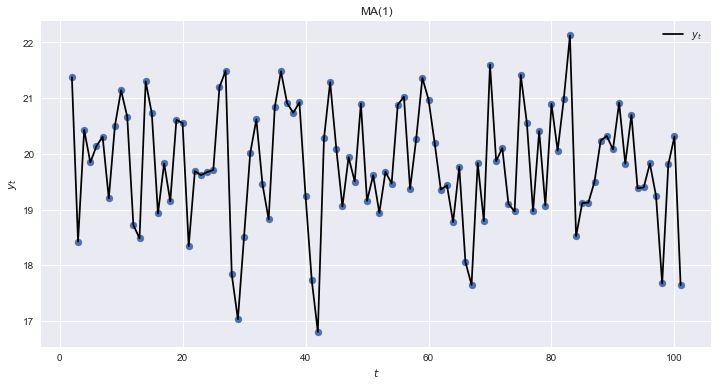

In [21]:
random.seed(867002105)

'''Generating the series'''
mean = 0
std = 1
samps = 101
mu = 20
theta_1 = -0.2

epsilons = list(np.random.normal(mean, std, size = samps))
y_t = [mu + epsilons[i] - theta_1*epsilons[i-1] for i in range(1, len(epsilons))]
yt_df = pd.DataFrame(
    y_t,
    index = [i for i in range(2, 102)],
    columns=['y_t']
)

with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(12,6))
    ax = plt.axes()
    plt.plot(yt_df, c = 'Black', label = '$y_t$')
    plt.scatter(yt_df.index, yt_df['y_t'])
    ax.set_xlabel('$t$')
    ax.set_ylabel('$y_t$')
    plt.legend()
    plt.title('MA(1)')
    plt.show()

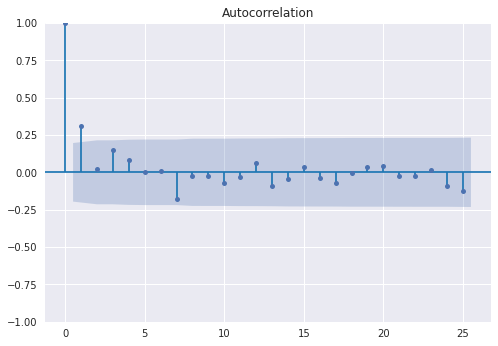

In [20]:
with plt.style.context('seaborn'):
    fig = plot_acf(yt_df, lags=25)

\pagebreak

# Generate a series of length $100$ with using your LIN as the random seed, plot the time-series plot, ACF plot and PACF plot (use type="partial" in acf function).

\scriptsize

*Excercise $5.4$ in the book. Problem (e) where (e) is augmented by professor*

\normalsize

$$y_t = 200 +0.7y_{t-1}+\epsilon_t$$

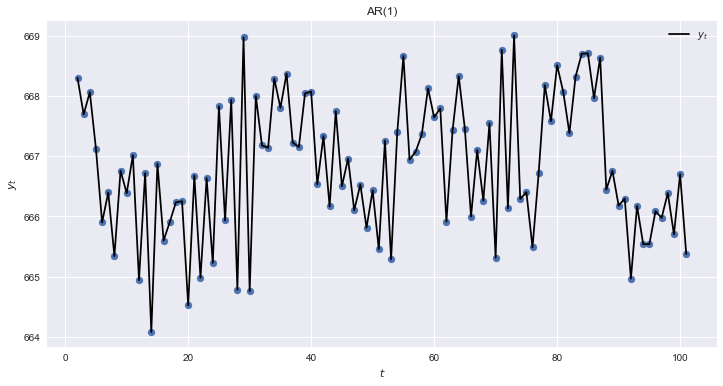

In [37]:
random.seed(867002105)

'''Generating the series'''
mean = 0
std = 1
samps = 101

delta = 200
phi = 0.7
mu = delta/(1-phi)


epsilons = list(np.random.normal(mean, std, size = samps))
y_t = []

for i in range(len(epsilons)):
    if i == 0:
        y_t_ent = delta + phi*mu+epsilons[i]
        y_t.append(y_t_ent)
    else:
        y_t_ent = delta + phi*y_t[i-2]+epsilons[i]
        y_t.append(y_t_ent)

yt_df = pd.DataFrame(
    y_t[1:],
    index = [i for i in range(2, 102)],
    columns=['y_t']
)

with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(12,6))
    ax = plt.axes()
    plt.plot(yt_df, c = 'Black', label = '$y_t$')
    plt.scatter(yt_df.index, yt_df['y_t'])
    ax.set_xlabel('$t$')
    ax.set_ylabel('$y_t$')
    plt.legend()
    plt.title('AR(1)')
    plt.show()


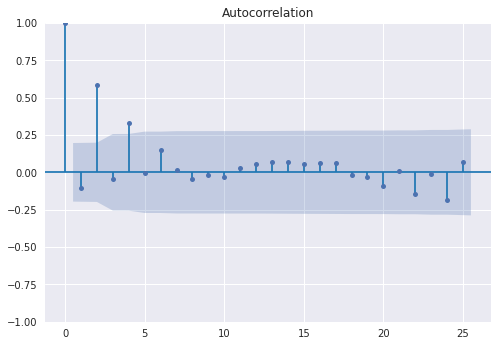

In [32]:
with plt.style.context('seaborn'):
    fig = plot_acf(yt_df.values.tolist(), lags=25)

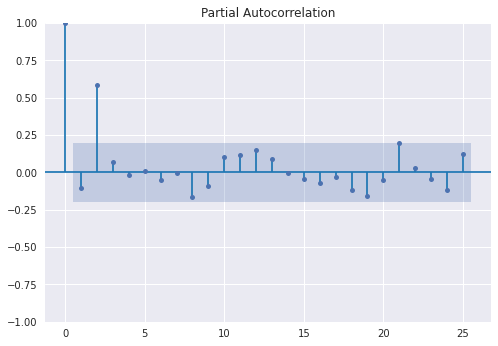

In [34]:
with plt.style.context('seaborn'):
    fig = plot_pacf(yt_df.values.tolist(), lags=25, method='ywm')